In [6]:
import sys
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
import shap 
from sklearn.feature_selection import mutual_info_classif


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,  VotingClassifier, AdaBoostClassifier, BaggingClassifier, RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, auc


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor


In [7]:
# train_features = torch.tensor(X_train, dtype=torch.float32)
# train_labels = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)  # Adding an extra dimension for the output
# test_features = torch.tensor(X_test, dtype=torch.float32)

# # Prepare the dataset and dataloader with unique names
# train_dataset_unique = TensorDataset(train_features, train_labels)
# train_loader_unique = DataLoader(train_dataset_unique, batch_size=64, shuffle=True)

# # Define the neural network architecture with unique names
# class DeepNet(nn.Module):
#     def __init__(self, input_dim):
#         super(DeepNet, self).__init__()
#         self.layer1 = nn.Linear(input_dim, 256)  # Increased number of neurons
#         self.layer2 = nn.Linear(256, 128)        # Another layer with 128 neurons
#         self.layer3 = nn.Linear(128, 64)         # Another layer with 64 neurons
#         self.layer4 = nn.Linear(64, 32)          # Another layer with 32 neurons
#         self.layer5 = nn.Linear(32, 16)          # Another layer with 16 neurons
#         self.output_layer = nn.Linear(16, 1)     # Output layer
#         self.activation = nn.ReLU()
#         self.output_activation = nn.Sigmoid()

#     def forward(self, x):
#         x = self.activation(self.layer1(x))
#         x = self.activation(self.layer2(x))
#         x = self.activation(self.layer3(x))
#         x = self.activation(self.layer4(x))
#         x = self.activation(self.layer5(x))
#         x = self.output_activation(self.output_layer(x))
#         return x

# # Initialize the network, loss function, and optimizer with unique names
# input_dim = 159  # Number of features in your dataset
# deep_model = DeepNet(input_dim)

# loss_function = nn.BCELoss()  # Binary Cross-Entropy Loss
# optimizer_unique = optim.Adam(deep_model.parameters(), lr=0.001)  # Adam optimizer

# # Training loop with unique names
# total_epochs = 50  # Adjust the number of epochs as needed
# deep_model.train()
# for epoch_num in range(total_epochs):
#     accumulated_loss = 0.0
#     for batch_features, batch_labels in train_loader_unique:
#         optimizer_unique.zero_grad()  # Clear the gradients
#         batch_outputs = deep_model(batch_features)  # Forward pass
#         batch_loss = loss_function(batch_outputs, batch_labels)  # Calculate loss
#         batch_loss.backward()  # Backward pass
#         optimizer_unique.step()  # Update weights

#         accumulated_loss += batch_loss.item() * batch_features.size(0)

#     avg_epoch_loss = accumulated_loss / len(train_loader_unique.dataset)
#     print(f'Epoch {epoch_num+1}/{total_epochs}, Loss: {avg_epoch_loss:.4f}')

# # Evaluating the model on the test set with unique names
# deep_model.eval()
# with torch.no_grad():
#     test_outputs = deep_model(test_features)
#     test_predictions = (test_outputs.numpy() > 0.5).astype(int)  # Apply threshold


In [8]:
# #evaluating the model
# print('Accuracy:', accuracy_score(y_test, test_predictions))
# print('Precision:', precision_score(y_test, test_predictions))
# print('Recall:', recall_score(y_test, test_predictions))
# print('F1 Score:', f1_score(y_test, test_predictions))
# print('ROC AUC Score:', roc_auc_score(y_test, test_predictions))

In [9]:
data = pd.read_csv("C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/data.csv")

In [10]:
data.head()

,Winner,title_bout,weight_class,no_of_rounds,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Red,False,Middleweight,3,0.255859,0.015625,0.509478,0.542871,0.002114,0.077554,...,0,2,1,0,Orthodox,187.96,190.50,185.0,34.0,27.0
1,Red,False,Welterweight,3,0.000000,0.000000,0.660000,0.470000,0.000000,0.400000,...,3,3,0,0,Orthodox,190.50,187.96,170.0,37.0,26.0
2,Blue,False,Light Heavyweight,3,0.128906,0.500000,0.314609,0.538398,0.013516,0.162188,...,1,5,5,1,Orthodox,193.04,193.04,205.0,35.0,35.0
3,Red,True,Light Heavyweight,5,0.125000,0.250000,0.565625,0.568750,0.645000,0.098750,...,1,5,0,0,Orthodox,193.04,200.66,205.0,31.0,36.0
4,Blue,False,Women's Bantamweight,3,0.003906,0.250000,0.392988,0.425273,0.723281,0.270820,...,1,0,4,0,Orthodox,167.64,167.64,135.0,32.0,32.0


In [11]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,7700,7701,7702,7703,7704,7705,7706,7707,7708,7709
Winner,Red,Red,Blue,Red,Blue,Blue,Blue,Blue,Red,Blue,...,Red,Red,Red,Red,Red,Red,Red,Red,Red,Red
title_bout,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
weight_class,Middleweight,Welterweight,Light Heavyweight,Light Heavyweight,Women's Bantamweight,Catch Weight,Featherweight,Featherweight,Bantamweight,Bantamweight,...,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R_Height_cms,187.96,190.5,193.04,193.04,167.64,170.18,175.26,172.72,177.8,167.64,...,185.42,182.88,185.42,180.34,190.5,177.8,182.88,187.96,NaN,177.8
R_Reach_cms,190.5,187.96,193.04,200.66,167.64,180.34,175.26,177.8,177.8,175.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R_Weight_lbs,185.0,170.0,205.0,205.0,135.0,145.0,145.0,145.0,135.0,135.0,...,175.0,210.0,175.0,190.0,260.0,170.0,210.0,225.0,NaN,210.0
B_age,34.0,37.0,35.0,31.0,32.0,29.0,27.0,34.0,29.0,28.0,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0


In [12]:
#checking for na/nan values

data["Winner"].isna().sum()

3

In [13]:
#discarding nan values from Winner column since they are not useful for the model

df = data.dropna(subset=["Winner"])

In [14]:
df["Winner"].isna().sum()

0

In [15]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7700,7701,7702,7703,7704,7705,7706,7707,7708,7709
Winner,Red,Red,Blue,Red,Blue,Blue,Blue,Blue,Red,Blue,...,Red,Red,Red,Red,Red,Red,Red,Red,Red,Red
title_bout,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
weight_class,Middleweight,Welterweight,Light Heavyweight,Light Heavyweight,Women's Bantamweight,Catch Weight,Featherweight,Featherweight,Bantamweight,Bantamweight,...,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R_Height_cms,187.96,190.5,193.04,193.04,167.64,170.18,175.26,172.72,177.8,167.64,...,185.42,182.88,185.42,180.34,190.5,177.8,182.88,187.96,NaN,177.8
R_Reach_cms,190.5,187.96,193.04,200.66,167.64,180.34,175.26,177.8,177.8,175.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R_Weight_lbs,185.0,170.0,205.0,205.0,135.0,145.0,145.0,145.0,135.0,135.0,...,175.0,210.0,175.0,190.0,260.0,170.0,210.0,225.0,NaN,210.0
B_age,34.0,37.0,35.0,31.0,32.0,29.0,27.0,34.0,29.0,28.0,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0


In [16]:
#now checking for na/nan values in the rest of the columns

df.isna().sum()

Winner             0
title_bout         0
weight_class       0
no_of_rounds       0
B_avg_KD        1661
                ... 
R_Height_cms      23
R_Reach_cms      418
R_Weight_lbs      21
B_age            172
R_age             82
Length: 140, dtype: int64

In [17]:
#since weight is same in each weight class, we can fill na values with the mean of each weight class

df["weight_class"].value_counts()


weight_class
Lightweight              1322
Welterweight             1285
Middleweight             1019
Featherweight             745
Heavyweight               704
Light Heavyweight         690
Bantamweight              671
Flyweight                 338
Women's Strawweight       305
Women's Flyweight         225
Women's Bantamweight      207
Open Weight                86
Catch Weight               81
Women's Featherweight      29
Name: count, dtype: int64

In [18]:
mean_weights = df.groupby("weight_class")[["R_Weight_lbs", "B_Weight_lbs"]].transform('mean')

mean_weights

,R_Weight_lbs,B_Weight_lbs
0,184.590775,184.794494
1,170.449805,169.729183
2,204.365217,202.308696
3,204.365217,202.308696
4,133.550725,132.439614
...,...,...
7705,225.635294,237.120482
7706,225.635294,237.120482
7707,225.635294,237.120482
7708,225.635294,237.120482


In [19]:
# df['R_Weight_lbs'] = df['R_Weight_lbs'].fillna(mean_weights['R_Weight_lbs'])
# df['B_Weight_lbs'] = df['B_Weight_lbs'].fillna(mean_weights['B_Weight_lbs'])

df.loc[df['R_Weight_lbs'].isna(), 'R_Weight_lbs'] = mean_weights['R_Weight_lbs']
df.loc[df['B_Weight_lbs'].isna(), 'B_Weight_lbs'] = mean_weights['B_Weight_lbs']

In [20]:
print(df['R_Weight_lbs'].isna().sum())
print(df['B_Weight_lbs'].isna().sum())

0
0


In [21]:
#using same approach for height

mean_heights = df.groupby("weight_class")[["R_Height_cms", "B_Height_cms"]].transform('mean')

mean_heights

,R_Height_cms,B_Height_cms
0,184.641532,184.251150
1,181.330304,181.063455
2,187.716691,187.315797
3,187.716691,187.315797
4,169.333333,168.940676
...,...,...
7705,186.226824,184.624337
7706,186.226824,184.624337
7707,186.226824,184.624337
7708,186.226824,184.624337


In [22]:
df.loc[df['R_Height_cms'].isna(), 'R_Height_cms'] = mean_heights['R_Height_cms']
df.loc[df['B_Height_cms'].isna(), 'B_Height_cms'] = mean_heights['B_Height_cms']

In [23]:
print(df['R_Height_cms'].isna().sum())
print(df['B_Height_cms'].isna().sum())

0
0


In [24]:
#correlation between reach and height

df[["R_Reach_cms", "R_Height_cms"]].corr()

,R_Reach_cms,R_Height_cms
R_Reach_cms,1.000000,0.896849
R_Height_cms,0.896849,1.000000


<Axes: >

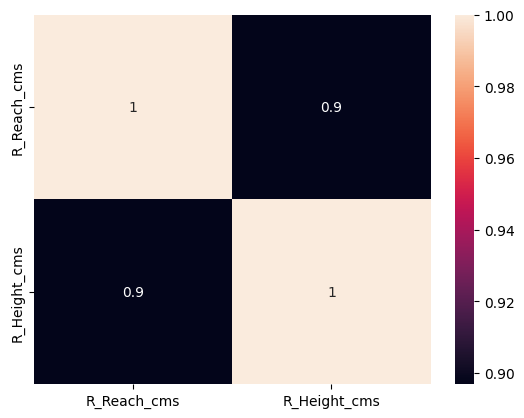

In [25]:
#correlation plot for height and reach

sns.heatmap(df[["R_Reach_cms", "R_Height_cms"]].corr(), annot=True)


<Axes: >

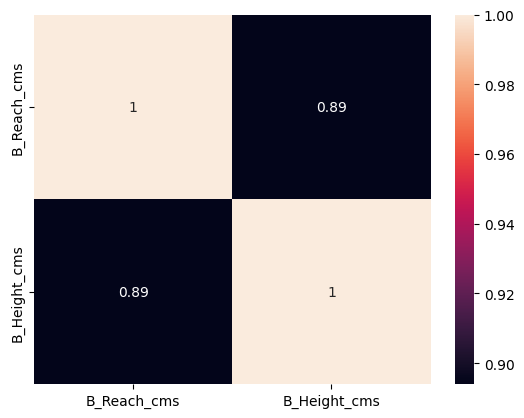

In [26]:
#correlation between reach and weight for both red and blue fighters

df[["R_Reach_cms", "R_Weight_lbs"]].corr()

df[["B_Reach_cms", "B_Weight_lbs"]].corr()

#correlation plot for reach and weight

#sns.heatmap(df[["R_Reach_cms", "R_Weight_lbs"]].corr(), annot=True)

sns.heatmap(df[["B_Reach_cms", "B_Height_cms"]].corr(), annot=True)

In [27]:
#since the correlation is high, we can fill na values in reach with the height. Reach is also the wingspan of the fighter which is usually the same as the height

df.loc[df['R_Reach_cms'].isna(), 'R_Reach_cms'] = df.loc[df['R_Reach_cms'].isna(), 'R_Height_cms']
df.loc[df['B_Reach_cms'].isna(), 'B_Reach_cms'] = df.loc[df['B_Reach_cms'].isna(), 'B_Height_cms']


In [28]:
df['B_Reach_cms'].isna().sum()

0

In [29]:
df.isna().sum()

Winner             0
title_bout         0
weight_class       0
no_of_rounds       0
B_avg_KD        1661
                ... 
R_Height_cms       0
R_Reach_cms        0
R_Weight_lbs       0
B_age            172
R_age             82
Length: 140, dtype: int64

In [30]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7700,7701,7702,7703,7704,7705,7706,7707,7708,7709
Winner,Red,Red,Blue,Red,Blue,Blue,Blue,Blue,Red,Blue,...,Red,Red,Red,Red,Red,Red,Red,Red,Red,Red
title_bout,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
weight_class,Middleweight,Welterweight,Light Heavyweight,Light Heavyweight,Women's Bantamweight,Catch Weight,Featherweight,Featherweight,Bantamweight,Bantamweight,...,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight,Open Weight
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R_Height_cms,187.96,190.5,193.04,193.04,167.64,170.18,175.26,172.72,177.8,167.64,...,185.42,182.88,185.42,180.34,190.5,177.8,182.88,187.96,186.226824,177.8
R_Reach_cms,190.5,187.96,193.04,200.66,167.64,180.34,175.26,177.8,177.8,175.26,...,185.42,182.88,185.42,180.34,190.5,177.8,182.88,187.96,186.226824,177.8
R_Weight_lbs,185.0,170.0,205.0,205.0,135.0,145.0,145.0,145.0,135.0,135.0,...,175.0,210.0,175.0,190.0,260.0,170.0,210.0,225.0,225.635294,210.0
B_age,34.0,37.0,35.0,31.0,32.0,29.0,27.0,34.0,29.0,28.0,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0


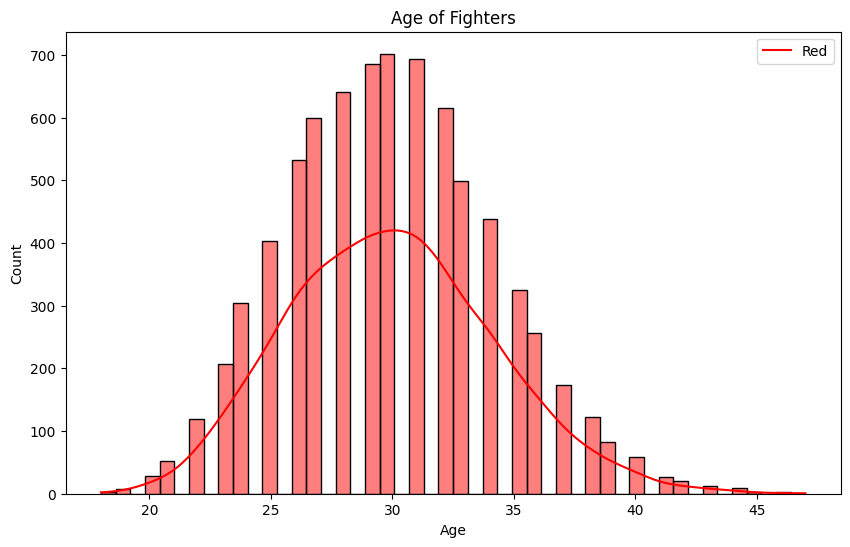

In [31]:
#plot of age in red and blue fighters

plt.figure(figsize=(10, 6))
sns.histplot(df["R_age"], color="red", kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age of Fighters")
plt.legend(["Red"])
plt.show()

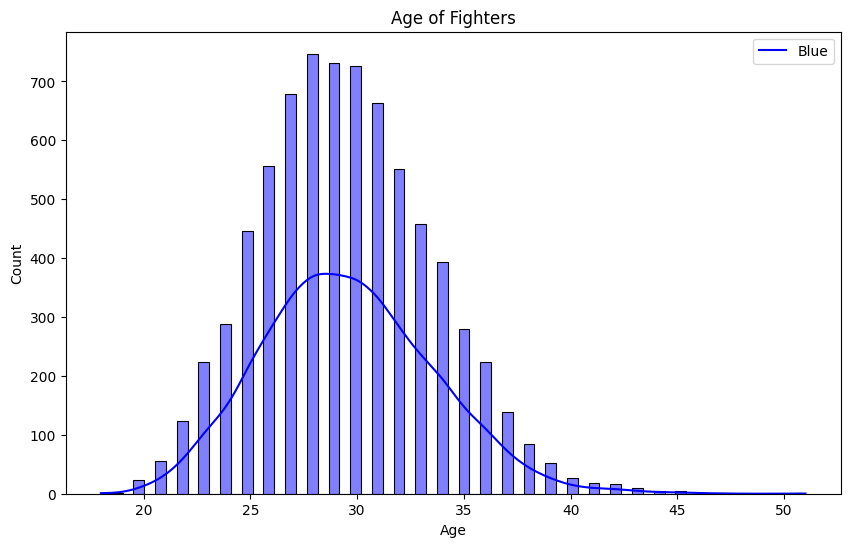

In [32]:
#plot of age in red and blue fighters

plt.figure(figsize=(10, 6))
sns.histplot(df["B_age"], color="blue", kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age of Fighters")
plt.legend(["Blue"])
plt.show()

In [33]:
#the age distribution looks like a normal distribution so we can fill na values with the median of the age because its robust to outliers

# df.loc[df["R_age"].isna(), "R_age"] = df["R_age"].median()
# df.loc[df["B_age"].isna(), "B_age"] = df["B_age"].median()

df = df.dropna(subset=["R_age", "B_age"])

In [34]:
null_columns = df.columns[df.isnull().any()]

print("Columns with null values:")
for column in null_columns:
    print(f"{column}: {df[column].isnull().sum()} null values")

Columns with null values:
B_avg_KD: 1535 null values
B_avg_opp_KD: 1535 null values
B_avg_SIG_STR_pct: 1535 null values
B_avg_opp_SIG_STR_pct: 1535 null values
B_avg_TD_pct: 1535 null values
B_avg_opp_TD_pct: 1535 null values
B_avg_SUB_ATT: 1535 null values
B_avg_opp_SUB_ATT: 1535 null values
B_avg_REV: 1535 null values
B_avg_opp_REV: 1535 null values
B_avg_SIG_STR_att: 1535 null values
B_avg_SIG_STR_landed: 1535 null values
B_avg_opp_SIG_STR_att: 1535 null values
B_avg_opp_SIG_STR_landed: 1535 null values
B_avg_TOTAL_STR_att: 1535 null values
B_avg_TOTAL_STR_landed: 1535 null values
B_avg_opp_TOTAL_STR_att: 1535 null values
B_avg_opp_TOTAL_STR_landed: 1535 null values
B_avg_TD_att: 1535 null values
B_avg_TD_landed: 1535 null values
B_avg_opp_TD_att: 1535 null values
B_avg_opp_TD_landed: 1535 null values
B_avg_HEAD_att: 1535 null values
B_avg_HEAD_landed: 1535 null values
B_avg_opp_HEAD_att: 1535 null values
B_avg_opp_HEAD_landed: 1535 null values
B_avg_BODY_att: 1535 null values
B_avg

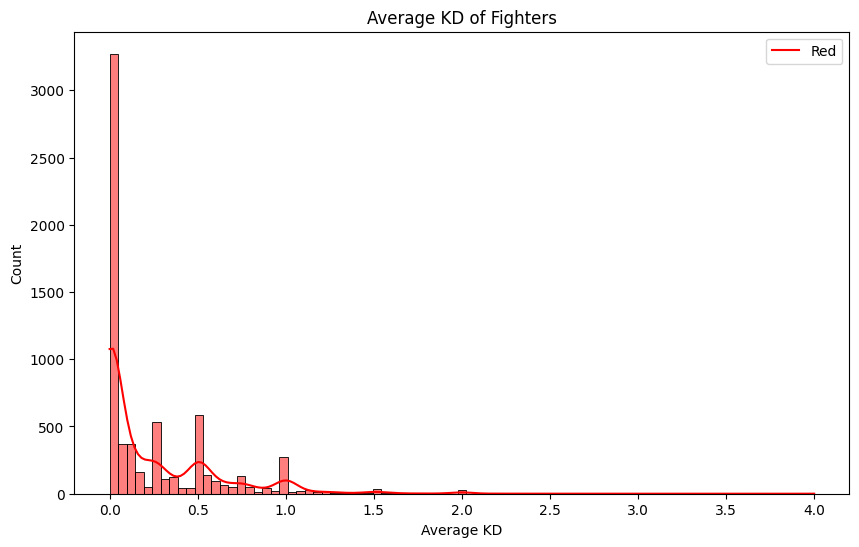

In [35]:
#plot for avg kd for red and blue fighters

plt.figure(figsize=(10, 6))
sns.histplot(df["R_avg_KD"], color="red", kde=True)
plt.xlabel("Average KD")
plt.ylabel("Count")
plt.title("Average KD of Fighters")
plt.legend(["Red"])
plt.show()

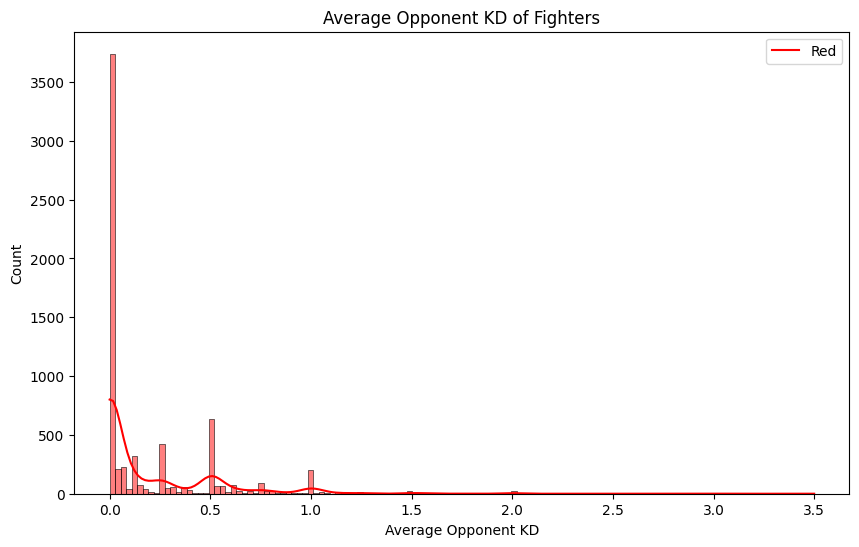

In [36]:
#plotting R_avg_opp_KD

plt.figure(figsize=(10, 6))
sns.histplot(df["R_avg_opp_KD"], color="red", kde=True)
plt.xlabel("Average Opponent KD")
plt.ylabel("Count")
plt.title("Average Opponent KD of Fighters")
plt.legend(["Red"])

plt.show()

In [37]:
numerical_columns = df[null_columns].select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df[null_columns].select_dtypes(include=['object']).columns

In [38]:
#categorical columns names
categorical_columns

Index(['B_Stance', 'R_Stance'], dtype='object')

In [39]:
iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(), max_iter=10, random_state=0)

# Apply the imputer on the numerical columns
df[numerical_columns] = iterative_imputer.fit_transform(df[numerical_columns])

# If there are any categorical columns with missing values, we need to handle those separately
# One common approach is to use the most frequent value (mode) for categorical data
for col in categorical_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Check again for any remaining null values
null_columns_after = df.columns[df.isnull().any()]
print("\nColumns with null values after imputation:")
for column in null_columns_after:
    print(f"{column}: {df[column].isnull().sum()} null values")

KeyboardInterrupt: 

In [40]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7652,7656,7665,7672,7675,7683,7687,7692,7695,7700
Winner,Red,Red,Blue,Red,Blue,Blue,Blue,Blue,Red,Blue,...,Red,Draw,Red,Red,Draw,Red,Red,Red,Red,Red
title_bout,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,False
weight_class,Middleweight,Welterweight,Light Heavyweight,Light Heavyweight,Women's Bantamweight,Catch Weight,Featherweight,Featherweight,Bantamweight,Bantamweight,...,Catch Weight,Catch Weight,Catch Weight,Open Weight,Catch Weight,Catch Weight,Open Weight,Open Weight,Catch Weight,Open Weight
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,2,2,2,1,2,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R_Height_cms,187.96,190.5,193.04,193.04,167.64,170.18,175.26,172.72,177.8,167.64,...,187.96,185.42,185.42,187.96,185.42,185.42,185.42,185.42,185.42,185.42
R_Reach_cms,190.5,187.96,193.04,200.66,167.64,180.34,175.26,177.8,177.8,175.26,...,187.96,182.88,182.88,187.96,182.88,185.42,185.42,185.42,185.42,185.42
R_Weight_lbs,185.0,170.0,205.0,205.0,135.0,145.0,145.0,145.0,135.0,135.0,...,250.0,205.0,205.0,250.0,205.0,175.0,175.0,175.0,175.0,175.0
B_age,34.0,37.0,35.0,31.0,32.0,29.0,27.0,34.0,29.0,28.0,...,28.0,28.0,37.0,27.0,28.0,36.0,51.0,26.0,30.0,24.0


In [41]:
df.dtypes

Winner           object
title_bout         bool
weight_class     object
no_of_rounds      int64
B_avg_KD        float64
                 ...   
R_Height_cms    float64
R_Reach_cms     float64
R_Weight_lbs    float64
B_age           float64
R_age           float64
Length: 140, dtype: object

In [42]:
categorical_columns.T

Index(['B_Stance', 'R_Stance'], dtype='object')

In [44]:
#fill with median for numerical columns

df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())


In [45]:
df.isna().sum()

Winner          0
title_bout      0
weight_class    0
no_of_rounds    0
B_avg_KD        0
               ..
R_Height_cms    0
R_Reach_cms     0
R_Weight_lbs    0
B_age           0
R_age           0
Length: 140, dtype: int64

In [46]:
#dropping weight class column since it is not useful for the model

df1 = df.drop(columns=["weight_class"])

In [47]:
df1.T

,0,1,2,3,4,5,6,7,8,9,...,7652,7656,7665,7672,7675,7683,7687,7692,7695,7700
Winner,Red,Red,Blue,Red,Blue,Blue,Blue,Blue,Red,Blue,...,Red,Draw,Red,Red,Draw,Red,Red,Red,Red,Red
title_bout,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,False
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,2,2,2,1,2,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.03125,0.03125,0.0,0.0
B_avg_opp_KD,0.015625,0.0,0.5,0.25,0.25,0.0,0.0,0.660652,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R_Height_cms,187.96,190.5,193.04,193.04,167.64,170.18,175.26,172.72,177.8,167.64,...,187.96,185.42,185.42,187.96,185.42,185.42,185.42,185.42,185.42,185.42
R_Reach_cms,190.5,187.96,193.04,200.66,167.64,180.34,175.26,177.8,177.8,175.26,...,187.96,182.88,182.88,187.96,182.88,185.42,185.42,185.42,185.42,185.42
R_Weight_lbs,185.0,170.0,205.0,205.0,135.0,145.0,145.0,145.0,135.0,135.0,...,250.0,205.0,205.0,250.0,205.0,175.0,175.0,175.0,175.0,175.0
B_age,34.0,37.0,35.0,31.0,32.0,29.0,27.0,34.0,29.0,28.0,...,28.0,28.0,37.0,27.0,28.0,36.0,51.0,26.0,30.0,24.0


In [48]:
#one hot encoding for categorical columns


df1 = pd.get_dummies(df1, columns=categorical_columns, drop_first=True)


In [49]:
df1.dtypes

Winner                object
title_bout              bool
no_of_rounds           int64
B_avg_KD             float64
B_avg_opp_KD         float64
                      ...   
B_Stance_Southpaw       bool
B_Stance_Switch         bool
R_Stance_Orthodox       bool
R_Stance_Southpaw       bool
R_Stance_Switch         bool
Length: 144, dtype: object

In [50]:
df1.T

,0,1,2,3,4,5,6,7,8,9,...,7652,7656,7665,7672,7675,7683,7687,7692,7695,7700
Winner,Red,Red,Blue,Red,Blue,Blue,Blue,Blue,Red,Blue,...,Red,Draw,Red,Red,Draw,Red,Red,Red,Red,Red
title_bout,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,False
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,2,2,2,1,2,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.03125,0.03125,0.0,0.0
B_avg_opp_KD,0.015625,0.0,0.5,0.25,0.25,0.0,0.0,0.660652,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B_Stance_Southpaw,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,True,False,False,False,True
B_Stance_Switch,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
R_Stance_Orthodox,True,True,True,True,True,True,False,True,False,True,...,False,True,True,False,True,False,False,False,False,False
R_Stance_Southpaw,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,True,True,True,True,True


In [51]:
boolean_columns = df1.select_dtypes(include=['bool']).columns
df1[boolean_columns] = df1[boolean_columns].astype(int)
print(df1.dtypes)


Winner                object
title_bout             int32
no_of_rounds           int64
B_avg_KD             float64
B_avg_opp_KD         float64
                      ...   
B_Stance_Southpaw      int32
B_Stance_Switch        int32
R_Stance_Orthodox      int32
R_Stance_Southpaw      int32
R_Stance_Switch        int32
Length: 144, dtype: object


In [52]:
df1.T

,0,1,2,3,4,5,6,7,8,9,...,7652,7656,7665,7672,7675,7683,7687,7692,7695,7700
Winner,Red,Red,Blue,Red,Blue,Blue,Blue,Blue,Red,Blue,...,Red,Draw,Red,Red,Draw,Red,Red,Red,Red,Red
title_bout,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,2,2,2,1,2,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.03125,0.03125,0.0,0.0
B_avg_opp_KD,0.015625,0.0,0.5,0.25,0.25,0.0,0.0,0.660652,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B_Stance_Southpaw,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,1
B_Stance_Switch,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
R_Stance_Orthodox,1,1,1,1,1,1,0,1,0,1,...,0,1,1,0,1,0,0,0,0,0
R_Stance_Southpaw,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,1,1,1,1


In [53]:
#checking if B_Stance and R_Stance are present in the columns

print(list(df1.columns))

['Winner', 'title_bout', 'no_of_rounds', 'B_avg_KD', 'B_avg_opp_KD', 'B_avg_SIG_STR_pct', 'B_avg_opp_SIG_STR_pct', 'B_avg_TD_pct', 'B_avg_opp_TD_pct', 'B_avg_SUB_ATT', 'B_avg_opp_SUB_ATT', 'B_avg_REV', 'B_avg_opp_REV', 'B_avg_SIG_STR_att', 'B_avg_SIG_STR_landed', 'B_avg_opp_SIG_STR_att', 'B_avg_opp_SIG_STR_landed', 'B_avg_TOTAL_STR_att', 'B_avg_TOTAL_STR_landed', 'B_avg_opp_TOTAL_STR_att', 'B_avg_opp_TOTAL_STR_landed', 'B_avg_TD_att', 'B_avg_TD_landed', 'B_avg_opp_TD_att', 'B_avg_opp_TD_landed', 'B_avg_HEAD_att', 'B_avg_HEAD_landed', 'B_avg_opp_HEAD_att', 'B_avg_opp_HEAD_landed', 'B_avg_BODY_att', 'B_avg_BODY_landed', 'B_avg_opp_BODY_att', 'B_avg_opp_BODY_landed', 'B_avg_LEG_att', 'B_avg_LEG_landed', 'B_avg_opp_LEG_att', 'B_avg_opp_LEG_landed', 'B_avg_DISTANCE_att', 'B_avg_DISTANCE_landed', 'B_avg_opp_DISTANCE_att', 'B_avg_opp_DISTANCE_landed', 'B_avg_CLINCH_att', 'B_avg_CLINCH_landed', 'B_avg_opp_CLINCH_att', 'B_avg_opp_CLINCH_landed', 'B_avg_GROUND_att', 'B_avg_GROUND_landed', 'B_avg

In [54]:
#saving the cleaned data to a csv file

df1.to_csv("C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/data_cleaned_new.csv", index=False)

In [55]:
df1 = pd.read_csv("C:/Users/kisha/Documents/Uni-Stuff/Dissertation/books/git/data_cleaned_new.csv")

In [56]:
features = df1.drop(columns=['Winner'])

In [57]:
features = features.apply(pd.to_numeric, errors='coerce')


In [58]:
categorical_columns = features.select_dtypes(include=['bool', 'object']).columns

# Drop the categorical columns
features_numerical = features.drop(columns=categorical_columns)

In [59]:
#checking for multicollinearity by calculating the VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sma

features_with_constant = sma.add_constant(features_numerical)

vif_data = pd.DataFrame()
vif_data["Feature"] = features_numerical.columns
vif_data["VIF"] = [variance_inflation_factor(features_with_constant.values, i + 1) for i in range(features_numerical.shape[1])]

# Display the VIFs
print(vif_data)



c:\Program Files\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


               Feature        VIF
0           title_bout   1.950533
1         no_of_rounds   2.143390
2             B_avg_KD   1.475802
3         B_avg_opp_KD   1.300631
4    B_avg_SIG_STR_pct   1.944474
..                 ...        ...
138  B_Stance_Southpaw  31.050333
139    B_Stance_Switch  10.751551
140  R_Stance_Orthodox  50.288012
141  R_Stance_Southpaw  43.370448
142    R_Stance_Switch  13.083649

[143 rows x 2 columns]


In [60]:
features_high_vif = vif_data[vif_data['VIF'] > 10]
features_high_vif

#putting them in a list for better readability
features_high_vif_list = list(features_high_vif['Feature'])
features_high_vif_list

['B_avg_SIG_STR_att',
 'B_avg_SIG_STR_landed',
 'B_avg_opp_SIG_STR_att',
 'B_avg_opp_SIG_STR_landed',
 'B_avg_TOTAL_STR_att',
 'B_avg_TOTAL_STR_landed',
 'B_avg_opp_TOTAL_STR_att',
 'B_avg_opp_TOTAL_STR_landed',
 'B_avg_HEAD_att',
 'B_avg_HEAD_landed',
 'B_avg_opp_HEAD_att',
 'B_avg_opp_HEAD_landed',
 'B_avg_BODY_att',
 'B_avg_BODY_landed',
 'B_avg_opp_BODY_att',
 'B_avg_opp_BODY_landed',
 'B_avg_LEG_att',
 'B_avg_LEG_landed',
 'B_avg_opp_LEG_att',
 'B_avg_opp_LEG_landed',
 'B_avg_DISTANCE_att',
 'B_avg_DISTANCE_landed',
 'B_avg_opp_DISTANCE_att',
 'B_avg_opp_DISTANCE_landed',
 'B_avg_CLINCH_att',
 'B_avg_CLINCH_landed',
 'B_avg_opp_CLINCH_att',
 'B_avg_opp_CLINCH_landed',
 'B_avg_GROUND_att',
 'B_avg_GROUND_landed',
 'B_avg_opp_GROUND_att',
 'B_avg_opp_GROUND_landed',
 'B_total_rounds_fought',
 'B_wins',
 'B_losses',
 'B_win_by_Decision_Split',
 'B_win_by_Decision_Unanimous',
 'B_win_by_KO/TKO',
 'B_win_by_Submission',
 'B_win_by_TKO_Doctor_Stoppage',
 'B_Weight_lbs',
 'R_avg_SIG_STR_

In [61]:
# Striking Efficiency (Accuracy)
df1['B_SIG_STR_Accuracy'] = df1['B_avg_SIG_STR_landed'] / df1['B_avg_SIG_STR_att']
df1['R_SIG_STR_Accuracy'] = df1['R_avg_SIG_STR_landed'] / df1['R_avg_SIG_STR_att']
df1['B_TOTAL_STR_Accuracy'] = df1['B_avg_TOTAL_STR_landed'] / df1['B_avg_TOTAL_STR_att']
df1['R_TOTAL_STR_Accuracy'] = df1['R_avg_TOTAL_STR_landed'] / df1['R_avg_TOTAL_STR_att']

# Opponents' Striking Efficiency (Accuracy)
df1['B_Opp_SIG_STR_Accuracy'] = df1['B_avg_opp_SIG_STR_landed'] / df1['B_avg_opp_SIG_STR_att']
df1['R_Opp_SIG_STR_Accuracy'] = df1['R_avg_opp_SIG_STR_landed'] / df1['R_avg_opp_SIG_STR_att']
df1['B_Opp_TOTAL_STR_Accuracy'] = df1['B_avg_opp_TOTAL_STR_landed'] / df1['B_avg_opp_TOTAL_STR_att']
df1['R_Opp_TOTAL_STR_Accuracy'] = df1['R_avg_opp_TOTAL_STR_landed'] / df1['R_avg_opp_TOTAL_STR_att']

# Targeted Striking Efficiency
df1['B_HEAD_STR_Accuracy'] = df1['B_avg_HEAD_landed'] / df1['B_avg_HEAD_att']
df1['R_HEAD_STR_Accuracy'] = df1['R_avg_HEAD_landed'] / df1['R_avg_HEAD_att']
df1['B_BODY_STR_Accuracy'] = df1['B_avg_BODY_landed'] / df1['B_avg_BODY_att']
df1['R_BODY_STR_Accuracy'] = df1['R_avg_BODY_landed'] / df1['R_avg_BODY_att']
df1['B_LEG_STR_Accuracy'] = df1['B_avg_LEG_landed'] / df1['B_avg_LEG_att']
df1['R_LEG_STR_Accuracy'] = df1['R_avg_LEG_landed'] / df1['R_avg_LEG_att']
df1['B_DISTANCE_STR_Accuracy'] = df1['B_avg_DISTANCE_landed'] / df1['B_avg_DISTANCE_att']
df1['R_DISTANCE_STR_Accuracy'] = df1['R_avg_DISTANCE_landed'] / df1['R_avg_DISTANCE_att']

# Opponent Targeted Striking Efficiency
df1['B_Opp_HEAD_STR_Accuracy'] = df1['B_avg_opp_HEAD_landed'] / df1['B_avg_opp_HEAD_att']
df1['R_Opp_HEAD_STR_Accuracy'] = df1['R_avg_opp_HEAD_landed'] / df1['R_avg_opp_HEAD_att']
df1['B_Opp_BODY_STR_Accuracy'] = df1['B_avg_opp_BODY_landed'] / df1['B_avg_opp_BODY_att']
df1['R_Opp_BODY_STR_Accuracy'] = df1['R_avg_opp_BODY_landed'] / df1['R_avg_opp_BODY_att']
df1['B_Opp_LEG_STR_Accuracy'] = df1['B_avg_opp_LEG_landed'] / df1['B_avg_opp_LEG_att']
df1['R_Opp_LEG_STR_Accuracy'] = df1['R_avg_opp_LEG_landed'] / df1['R_avg_opp_LEG_att']
df1['B_Opp_DISTANCE_STR_Accuracy'] = df1['B_avg_opp_DISTANCE_landed'] / df1['B_avg_opp_DISTANCE_att']
df1['R_Opp_DISTANCE_STR_Accuracy'] = df1['R_avg_opp_DISTANCE_landed'] / df1['R_avg_opp_DISTANCE_att']

# Clinch and Ground Efficiency
df1['B_CLINCH_STR_Accuracy'] = df1['B_avg_CLINCH_landed'] / df1['B_avg_CLINCH_att']
df1['R_CLINCH_STR_Accuracy'] = df1['R_avg_CLINCH_landed'] / df1['R_avg_CLINCH_att']
df1['B_GROUND_STR_Accuracy'] = df1['B_avg_GROUND_landed'] / df1['B_avg_GROUND_att']
df1['R_GROUND_STR_Accuracy'] = df1['R_avg_GROUND_landed'] / df1['R_avg_GROUND_att']

# Opponent Clinch and Ground Efficiency
df1['B_Opp_CLINCH_STR_Accuracy'] = df1['B_avg_opp_CLINCH_landed'] / df1['B_avg_opp_CLINCH_att']
df1['R_Opp_CLINCH_STR_Accuracy'] = df1['R_avg_opp_CLINCH_landed'] / df1['R_avg_opp_CLINCH_att']
df1['B_Opp_GROUND_STR_Accuracy'] = df1['B_avg_opp_GROUND_landed'] / df1['B_avg_opp_GROUND_att']
df1['R_Opp_GROUND_STR_Accuracy'] = df1['R_avg_opp_GROUND_landed'] / df1['R_avg_opp_GROUND_att']

# Overall Fight Metrics
df1['Rounds_Diff'] = df1['R_total_rounds_fought'] - df1['B_total_rounds_fought']
df1['B_Win_Loss_Ratio'] = df1['B_wins'] / (df1['B_losses'] + 1)
df1['R_Win_Loss_Ratio'] = df1['R_wins'] / (df1['R_losses'] + 1)

# Replace any infinite values created during division with NaN
df1.replace([np.inf, -np.inf], np.nan, inplace=True)

# Optional: Fill NaNs that might result from 0 division (e.g., 0/0)
df1.fillna(0, inplace=True)

# Check the dataframe to ensure the new features were added correctly
df1.head()

,Winner,title_bout,no_of_rounds,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,...,R_CLINCH_STR_Accuracy,B_GROUND_STR_Accuracy,R_GROUND_STR_Accuracy,B_Opp_CLINCH_STR_Accuracy,R_Opp_CLINCH_STR_Accuracy,B_Opp_GROUND_STR_Accuracy,R_Opp_GROUND_STR_Accuracy,Rounds_Diff,B_Win_Loss_Ratio,R_Win_Loss_Ratio
0,Red,0,3,0.255859,0.015625,0.509478,0.542871,0.002114,0.077554,0.031250,...,1.000000,0.698520,0.642857,0.804964,0.769231,0.663604,0.500000,-21,0.625,1.500000
1,Red,0,3,0.000000,0.000000,0.660000,0.470000,0.000000,0.400000,0.000000,...,0.873494,1.000000,0.629630,0.800000,0.727069,0.777778,0.375000,14,1.000,7.000000
2,Blue,0,3,0.128906,0.500000,0.314609,0.538398,0.013516,0.162188,0.464844,...,0.845014,0.786195,0.767511,0.836371,0.522633,0.728534,0.684384,32,1.500,1.300000
3,Red,1,5,0.125000,0.250000,0.565625,0.568750,0.645000,0.098750,0.125000,...,0.887701,0.702532,0.811266,0.957447,0.685567,0.869347,0.875486,6,2.000,3.500000
4,Blue,0,3,0.003906,0.250000,0.392988,0.425273,0.723281,0.270820,0.503906,...,0.923489,0.442660,0.841768,0.719424,0.874951,0.786963,0.867930,1,1.750,0.833333


In [62]:
columns_to_drop = [
    'B_avg_SIG_STR_att', 'B_avg_SIG_STR_landed', 'B_avg_opp_SIG_STR_att', 'B_avg_opp_SIG_STR_landed',
    'B_avg_TOTAL_STR_att', 'B_avg_TOTAL_STR_landed', 'B_avg_opp_TOTAL_STR_att', 'B_avg_opp_TOTAL_STR_landed',
    'B_avg_HEAD_att', 'B_avg_HEAD_landed', 'B_avg_opp_HEAD_att', 'B_avg_opp_HEAD_landed',
    'B_avg_BODY_att', 'B_avg_BODY_landed', 'B_avg_opp_BODY_att', 'B_avg_opp_BODY_landed',
    'B_avg_LEG_att', 'B_avg_LEG_landed', 'B_avg_opp_LEG_att', 'B_avg_opp_LEG_landed',
    'B_avg_DISTANCE_att', 'B_avg_DISTANCE_landed', 'B_avg_opp_DISTANCE_att', 'B_avg_opp_DISTANCE_landed',
    'B_avg_CLINCH_att', 'B_avg_CLINCH_landed', 'B_avg_opp_CLINCH_att', 'B_avg_opp_CLINCH_landed',
    'B_avg_GROUND_att', 'B_avg_GROUND_landed', 'B_avg_opp_GROUND_att', 'B_avg_opp_GROUND_landed',
    'B_total_rounds_fought', 'B_wins', 'B_losses',
    'R_avg_SIG_STR_att', 'R_avg_SIG_STR_landed', 'R_avg_opp_SIG_STR_att', 'R_avg_opp_SIG_STR_landed',
    'R_avg_TOTAL_STR_att', 'R_avg_TOTAL_STR_landed', 'R_avg_opp_TOTAL_STR_att', 'R_avg_opp_TOTAL_STR_landed',
    'R_avg_HEAD_att', 'R_avg_HEAD_landed', 'R_avg_opp_HEAD_att', 'R_avg_opp_HEAD_landed',
    'R_avg_BODY_att', 'R_avg_BODY_landed', 'R_avg_opp_BODY_att', 'R_avg_opp_BODY_landed',
    'R_avg_LEG_att', 'R_avg_LEG_landed', 'R_avg_opp_LEG_att', 'R_avg_opp_LEG_landed',
    'R_avg_DISTANCE_att', 'R_avg_DISTANCE_landed', 'R_avg_opp_DISTANCE_att', 'R_avg_opp_DISTANCE_landed',
    'R_avg_CLINCH_att', 'R_avg_CLINCH_landed', 'R_avg_opp_CLINCH_att', 'R_avg_opp_CLINCH_landed',
    'R_avg_GROUND_att', 'R_avg_GROUND_landed', 'R_avg_opp_GROUND_att', 'R_avg_opp_GROUND_landed',
    'R_total_rounds_fought', 'R_wins', 'R_losses'
]


In [63]:
df1.T

,0,1,2,3,4,5,6,7,8,9,...,7483,7484,7485,7486,7487,7488,7489,7490,7491,7492
Winner,Red,Red,Blue,Red,Blue,Blue,Blue,Blue,Red,Blue,...,Red,Draw,Red,Red,Draw,Red,Red,Red,Red,Red
title_bout,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,2,2,2,1,2,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.03125,0.03125,0.0,0.0
B_avg_opp_KD,0.015625,0.0,0.5,0.25,0.25,0.0,0.0,0.660652,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B_Opp_GROUND_STR_Accuracy,0.663604,0.777778,0.728534,0.869347,0.786963,0.871795,0.0,0.594414,0.0,0.827586,...,0.664855,0.525,1.0,0.666667,0.319708,0.0,0.697584,0.697584,0.0,0.0
R_Opp_GROUND_STR_Accuracy,0.5,0.375,0.684384,0.875486,0.86793,0.647749,0.642462,0.553355,0.0,0.730873,...,1.0,0.666667,0.666667,1.0,0.0,0.350649,0.6,0.6,0.6,0.6
Rounds_Diff,-21,14,32,6,1,37,33,10,2,30,...,-1,0,-2,3,-6,5,5,4,0,0
B_Win_Loss_Ratio,0.625,1.0,1.5,2.0,1.75,1.5,1.0,0.916667,0.0,1.0,...,1.666667,2.0,2.5,1.0,8.0,1.0,0.0,0.0,3.0,1.0


In [64]:
df1_reduced = df1.drop(columns=columns_to_drop)

In [65]:
df1_reduced.T

,0,1,2,3,4,5,6,7,8,9,...,7483,7484,7485,7486,7487,7488,7489,7490,7491,7492
Winner,Red,Red,Blue,Red,Blue,Blue,Blue,Blue,Red,Blue,...,Red,Draw,Red,Red,Draw,Red,Red,Red,Red,Red
title_bout,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
no_of_rounds,3,3,3,5,3,3,3,3,3,3,...,2,2,2,1,2,1,1,1,1,1
B_avg_KD,0.255859,0.0,0.128906,0.125,0.003906,1.25,1.0,0.376057,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.03125,0.03125,0.0,0.0
B_avg_opp_KD,0.015625,0.0,0.5,0.25,0.25,0.0,0.0,0.660652,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B_Opp_GROUND_STR_Accuracy,0.663604,0.777778,0.728534,0.869347,0.786963,0.871795,0.0,0.594414,0.0,0.827586,...,0.664855,0.525,1.0,0.666667,0.319708,0.0,0.697584,0.697584,0.0,0.0
R_Opp_GROUND_STR_Accuracy,0.5,0.375,0.684384,0.875486,0.86793,0.647749,0.642462,0.553355,0.0,0.730873,...,1.0,0.666667,0.666667,1.0,0.0,0.350649,0.6,0.6,0.6,0.6
Rounds_Diff,-21,14,32,6,1,37,33,10,2,30,...,-1,0,-2,3,-6,5,5,4,0,0
B_Win_Loss_Ratio,0.625,1.0,1.5,2.0,1.75,1.5,1.0,0.916667,0.0,1.0,...,1.666667,2.0,2.5,1.0,8.0,1.0,0.0,0.0,3.0,1.0


In [66]:
#dropping draw class in winner column

df1_reduced = df1_reduced[df1_reduced["Winner"] != "Draw"]

In [67]:
#encoding red to 0 and blue to 1 in winner column

df1_reduced["Winner"] = df1_reduced["Winner"].apply(lambda x: 0 if x == "Red" else 1)

In [68]:

X = df1_reduced.drop(columns=["Winner"])
y = df1_reduced["Winner"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [70]:
#logistic regression with best parameters Best Parameters: {'C': 100, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}

log_reg = LogisticRegression(C=100, class_weight=None, max_iter=1000, penalty='l1', solver='liblinear')

log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))
print('Confusion Matrix', confusion_matrix(y_test, y_pred))



Accuracy: 0.636981645139361
Precision: 0.511727078891258
Recall: 0.44036697247706424
F1 Score: 0.47337278106508873
ROC AUC Score: 0.5965333782471715
Confusion Matrix [[697 229]
 [305 240]]


Accuracy: 0.637661454792658
Precision: 0.49492671927846676
Recall: 0.4153263954588458
F1 Score: 0.45164609053497945
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      1885
           1       0.49      0.42      0.45      1057

    accuracy                           0.64      2942
   macro avg       0.60      0.59      0.59      2942
weighted avg       0.63      0.64      0.63      2942



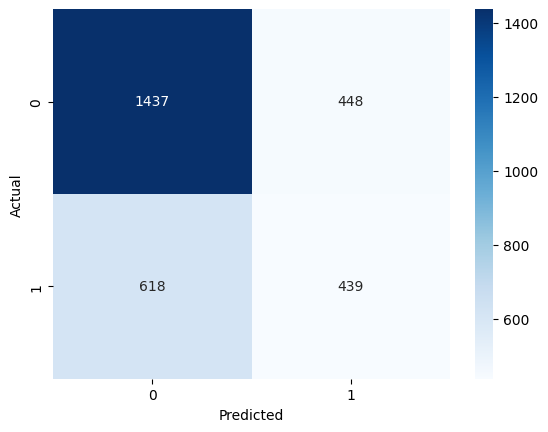

In [17]:
#logistic regression model

X = df1_reduced.drop(columns=['Winner'])
y = df1_reduced['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

#smote to handle imbalanced data

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

#confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

#classification report

print(classification_report(y_test, y_pred))



In [18]:
#xgboost model

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))


Accuracy: 0.6274643099932019
Precision: 0.47571606475716066
Recall: 0.36140018921475875


In [20]:
#trying adasyn to handle imbalanced data

from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

X_train, y_train = adasyn.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg_ada = LogisticRegression(max_iter=1000)
log_reg_ada.fit(X_train_scaled, y_train)

y_pred = log_reg_ada.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))



Accuracy: 0.6386811692726037
Precision: 0.49668141592920356
Recall: 0.4247871333964049
F1 Score: 0.4579296277409485


In [24]:
#trying out tomeklinks to handle imbalanced data

from imblearn.under_sampling import TomekLinks

tomek = TomekLinks()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

X_train, y_train = tomek.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg_tomek = LogisticRegression(max_iter=1000)
log_reg_tomek.fit(X_train_scaled, y_train)

y_pred = log_reg_tomek.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.6447994561522774
Precision: 0.5073529411764706
Recall: 0.391674550614948
F1 Score: 0.4420715429791778


In [25]:
#kfold cross validation with tomeklinks and logistic regression

kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train, y_train = tomek.fit_resample(X_train, y_train)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    log_reg_tomek = LogisticRegression(max_iter=1000)
    log_reg_tomek.fit(X_train_scaled, y_train)

    y_pred = log_reg_tomek.predict(X_test_scaled)

    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

print("Accuracy:", np.mean(accuracy_scores))
print("Precision:", np.mean(precision_scores))
print("Recall:", np.mean(recall_scores))
print("F1 Score:", np.mean(f1_scores))


Accuracy: 0.6531997761715155
Precision: 0.5200938392380098
Recall: 0.4095910740373781
F1 Score: 0.4580793810439273


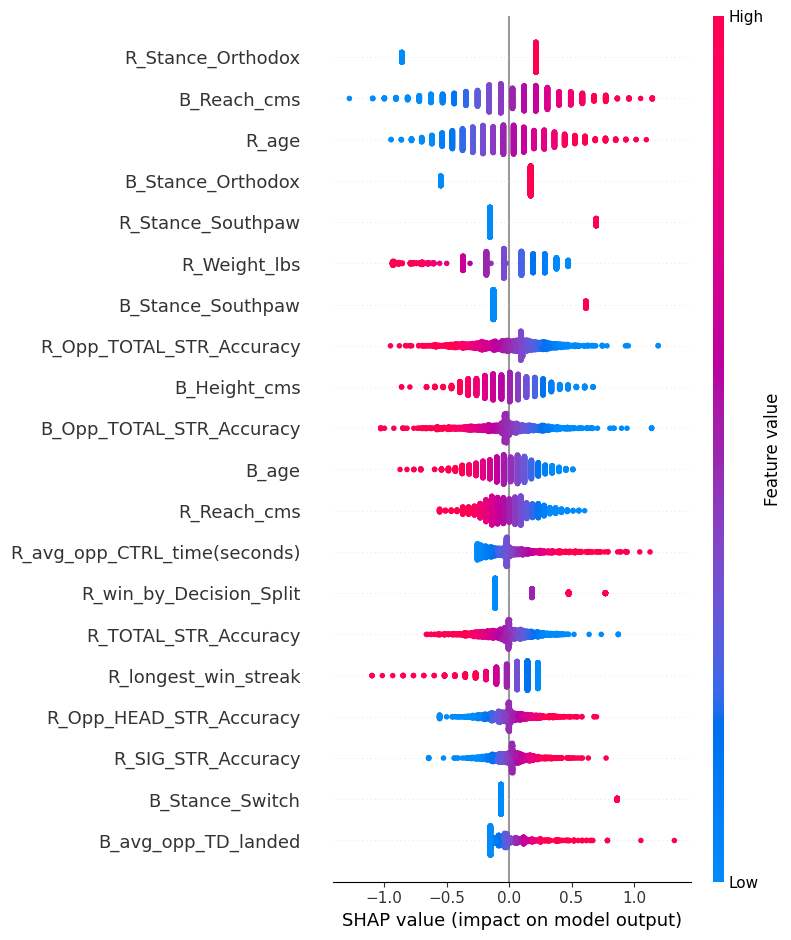

In [28]:
#using shapeley values to explain the model

explainer = shap.Explainer(log_reg_tomek, X_train_scaled)
shap_values = explainer(X_test_scaled)

#summary plot with feature names

shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

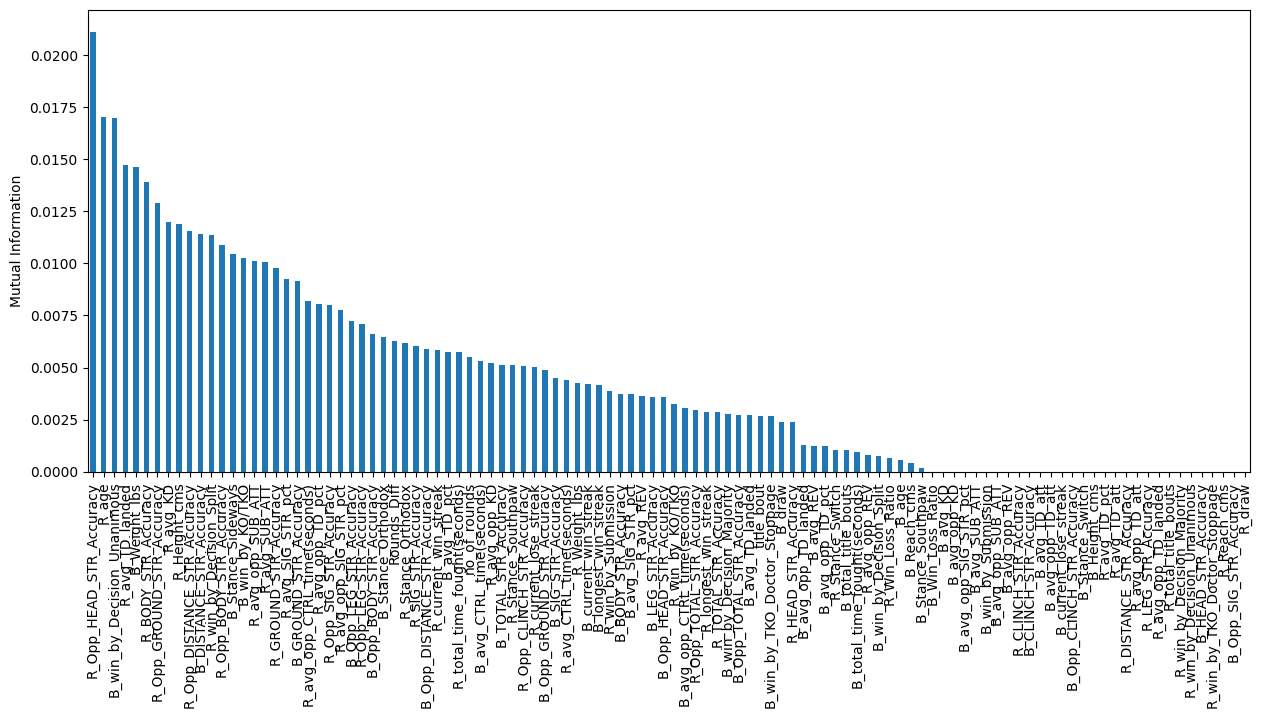

In [30]:
#mutual information for feature selection

mi = mutual_info_classif(X, y)

mi = pd.Series(mi, index=X.columns)
mi = mi.sort_values(ascending=False)

mi.plot.bar(figsize=(15, 6))
plt.ylabel("Mutual Information")
plt.show()


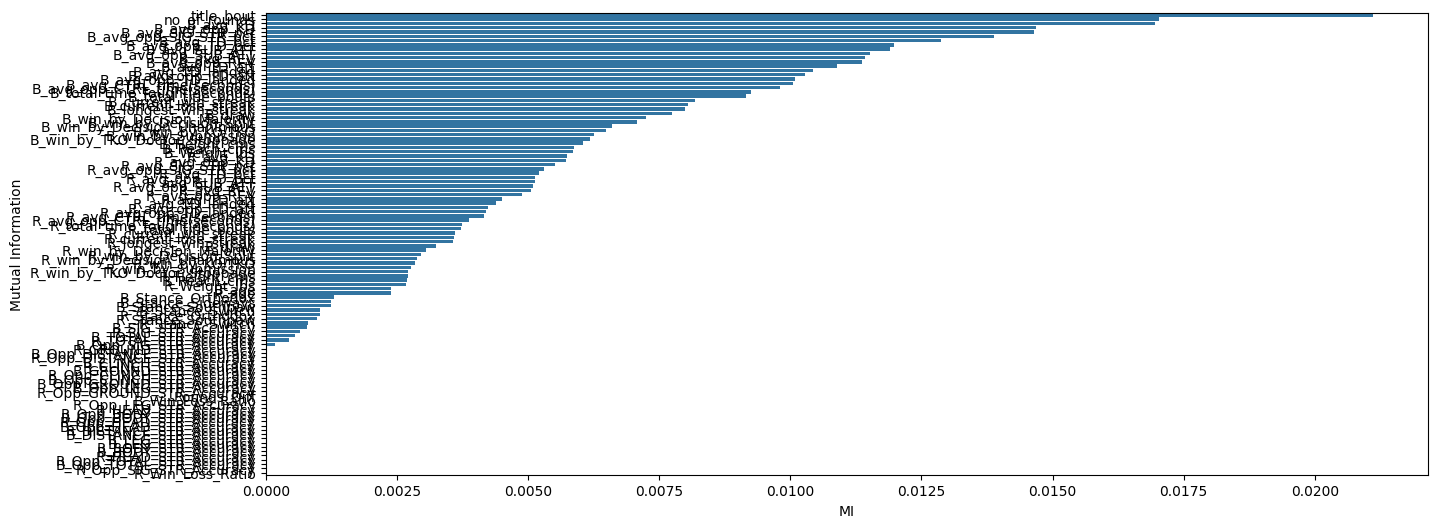

In [31]:
#plotting mi values with shapeley values for feature selection

mi_shap = pd.DataFrame({'Feature': X.columns, 'MI': mi.values, 'SHAP': np.abs(shap_values.values).mean(axis=0)})
mi_shap = mi_shap.sort_values(by='MI', ascending=False)

plt.figure(figsize=(15, 6))
sns.barplot(x='MI', y='Feature', data=mi_shap)
plt.ylabel("Mutual Information")
plt.show()


In [29]:
X.T

,0,1,2,3,4,5,6,7,8,9,...,7481,7482,7483,7485,7486,7488,7489,7490,7491,7492
title_bout,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000,0.0
no_of_rounds,3.000000,3.000000,3.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.00,3.000000,...,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000,1.0
B_avg_KD,0.255859,0.000000,0.128906,0.125000,0.003906,1.250000,1.000000,0.376057,0.00,1.000000,...,0.185789,0.500000,0.000000,0.000000,0.000000,0.000000,0.351416,0.351773,0.000,0.0
B_avg_opp_KD,0.015625,0.000000,0.500000,0.250000,0.250000,0.000000,0.000000,0.660652,0.00,0.000000,...,0.149745,0.000000,0.000000,0.000000,0.000000,0.000000,0.120740,0.167179,0.000,0.0
B_avg_SIG_STR_pct,0.509478,0.660000,0.314609,0.565625,0.392988,0.651250,0.690000,0.356153,0.38,0.460000,...,0.484849,0.667500,0.095000,0.480312,0.000000,0.000000,0.481132,0.494297,0.645,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B_Opp_GROUND_STR_Accuracy,0.663604,0.777778,0.728534,0.869347,0.786963,0.871795,0.000000,0.594414,0.00,0.827586,...,0.712565,0.857143,0.664855,1.000000,0.666667,0.000000,0.664315,0.677524,0.000,0.0
R_Opp_GROUND_STR_Accuracy,0.500000,0.375000,0.684384,0.875486,0.867930,0.647749,0.642462,0.553355,0.00,0.730873,...,0.678469,0.822964,1.000000,0.666667,1.000000,0.350649,0.600000,0.600000,0.600,0.6
Rounds_Diff,-21.000000,14.000000,32.000000,6.000000,1.000000,37.000000,33.000000,10.000000,2.00,30.000000,...,0.000000,7.000000,-1.000000,-2.000000,3.000000,5.000000,5.000000,4.000000,0.000,0.0
B_Win_Loss_Ratio,0.625000,1.000000,1.500000,2.000000,1.750000,1.500000,1.000000,0.916667,0.00,1.000000,...,0.000000,3.000000,1.666667,2.500000,1.000000,1.000000,0.000000,0.000000,3.000,1.0


In [26]:
#xgb with tomeklinks and kfold cross validation

kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train, y_train = tomek.fit_resample(X_train, y_train)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    xgb_clf.fit(X_train, y_train)

    y_pred = xgb_clf.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

print("Accuracy:", np.mean(accuracy_scores))
print("Precision:", np.mean(precision_scores))
print("Recall:", np.mean(recall_scores))
print("F1 Score:", np.mean(f1_scores))

Accuracy: 0.6257288993095539
Precision: 0.4744650815187924
Recall: 0.4233459549766649
F1 Score: 0.4473326141582971


In [22]:
#adasyn with random oversampling

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

X_train, y_train = ros.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg_ros = LogisticRegression(max_iter=1000)
log_reg_ros.fit(X_train_scaled, y_train)

y_pred = log_reg_ros.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.619986403806934
Precision: 0.4767707539984768
Recall: 0.5922421948912016
F1 Score: 0.5282700421940928


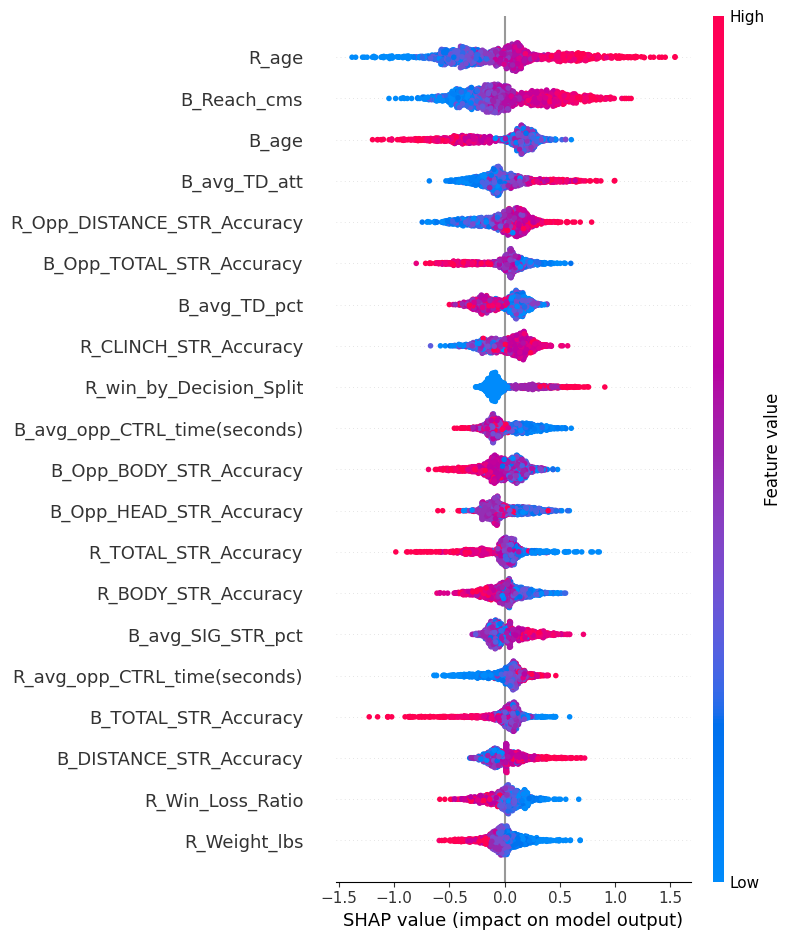

In [32]:
#shapley values of xgb

explainer = shap.Explainer(xgb_clf, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X.columns)

